In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess 
from scipy.integrate import odeint

path = "/Users/muon02/lgca-feedback/lgca-feedback/no_img/"

### First try

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 8     |
| $N_{T}$        | 12    |
| $\nu$          | 1.0   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.5   |
| $d$            | 0     |

In [4]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


def F(Ρ,t,N_s,N_t,nu,d,p_asym,alpha):
    ρS, ρT = Ρ
    N = N_s + N_t
    pMUT = p_asym*(1-ρT/N)**alpha
    excludS = (N_s-ρS)/N_s
    excludT = (N_t-ρT)*(N_t-(ρT+1))/(N_t*(N_t-1))
    dρdt = [(1/N)*nu*(ρS/N)*excludS*pMUT-(1/N)*nu*(ρS/N)*(1-pMUT)*excludT,
            2*(1/N)*nu*(ρS/N)*excludT*(1-pMUT)-(1/N)*d*(ρT/N)]
    return dρdt


def make_graph(Ρ_S0,P_T0,N_s,N_t,nu,d,p_asym,alpha,rep,time):
    P0 = [Ρ_S0,P_T0]
    t = np.linspace(0, time, time+1)
    sol = odeint(F, P0, t, args=(N_s,N_t,nu,d,p_asym,alpha))
    
    data_par_terminal = str(N_s) + " " + str(N_t) 
    data_par_terminal = data_par_terminal + " " + str(nu) + " " + str(alpha)
    data_par_terminal = data_par_terminal + " " + str(p_asym) + " " + str(d) 
    data_par_terminal = data_par_terminal + " " + str(time)+ " " + str(rep) + " " + str(Ρ_S0) + " " + str(P_T0) 
    subprocess.run("cd "+path+" && ./sim005.out 100 "+data_par_terminal, capture_output=True, shell=True)
    %run /Users/muon02/lgca-feedback/lgca-feedback/no_img/output/ns_info.py
    %run /Users/muon02/lgca-feedback/lgca-feedback/no_img/output/nt_info.py
    mean_ns = np.array([ns_info[i][0] for i in range(time)])
    std_ns = np.array([ns_info[i][1] for i in range(time)])
    best_mean_ns = mean_ns + std_ns
    worst_mean_ns = mean_ns - std_ns
    mean_nt = np.array([nt_info[i][0] for i in range(time)])
    std_nt = np.array([nt_info[i][1] for i in range(time)])
    best_mean_nt = mean_nt + std_nt
    worst_mean_nt = mean_nt - std_nt
    
    plt.figure(dpi=200)
    
    plt.plot(range(time), mean_ns, '--', color="midnightblue",label=r'$\rho_{S}$ Simulation')
    plt.fill_between(range(time), worst_mean_ns, best_mean_ns,alpha=0.2)
    
    plt.plot(range(time), mean_nt, '--', color="firebrick",label=r'$\rho_{T}$ Simulation')
    plt.fill_between(range(time), worst_mean_nt, best_mean_nt,alpha=0.2)
    

    plt.plot(t, sol[:, 0], 'b', label=r'$\rho_{S}(t)$')

    plt.plot(t, sol[:, 1], 'r', label=r'$\rho_{T}(t)$')


    plt.xlabel('t')
    plt.ylabel('Density')

    plt.grid(axis='y')
    plt.legend(loc='best')

    plt.show()

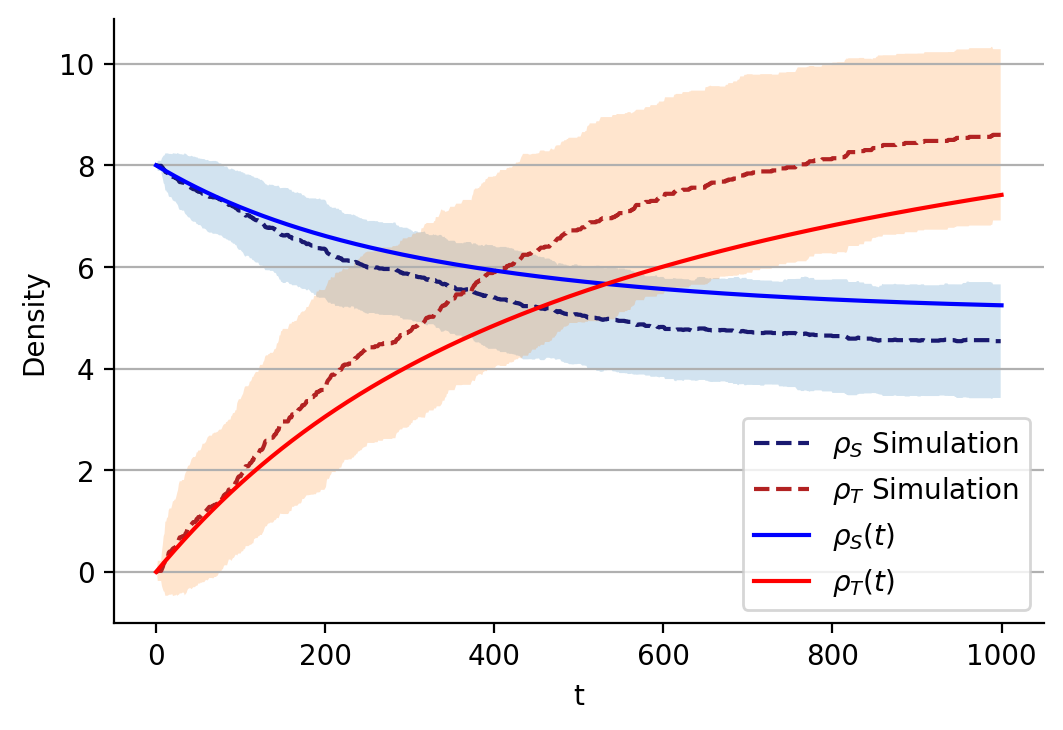

In [6]:
make_graph(8,0,8,12,1.0,0.0,0.5,2,100,1000)

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 12    |
| $N_{T}$        | 12    |
| $\nu$          | 0.8   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.3   |
| $d$            | 0.5   |

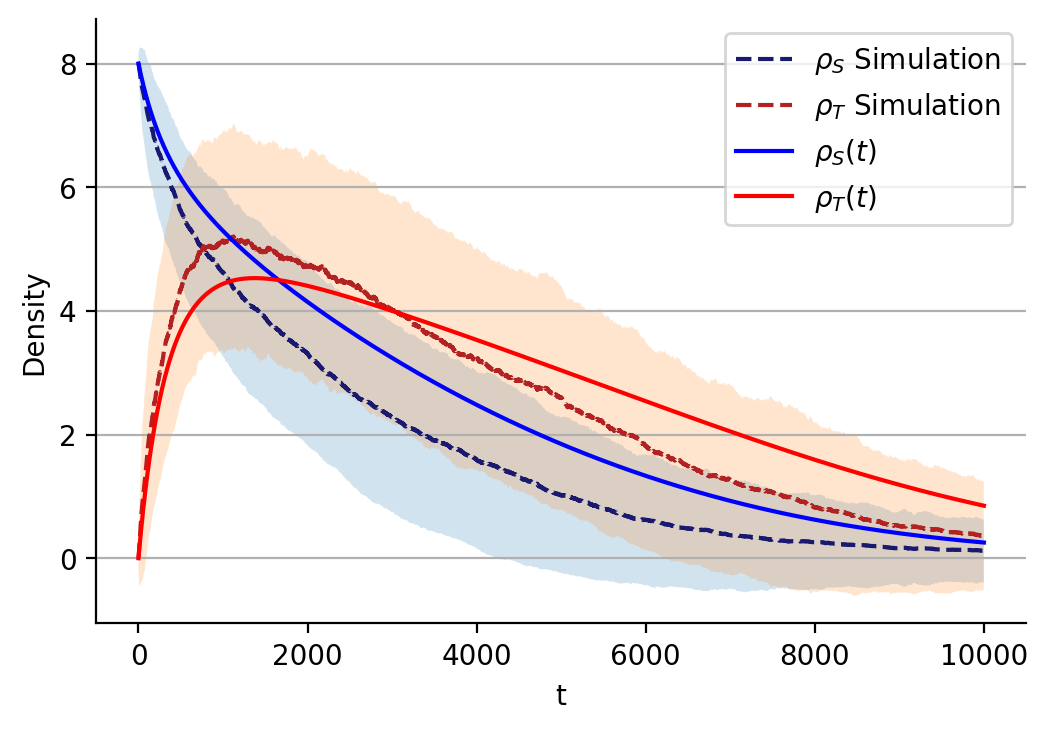

In [105]:
make_graph(8,0,12,12,0.8,0.5,0.3,2,500,10000)

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 12    |
| $N_{T}$        | 12    |
| $\nu$          | 0.8   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.5   |
| $d$            | 0.5   |

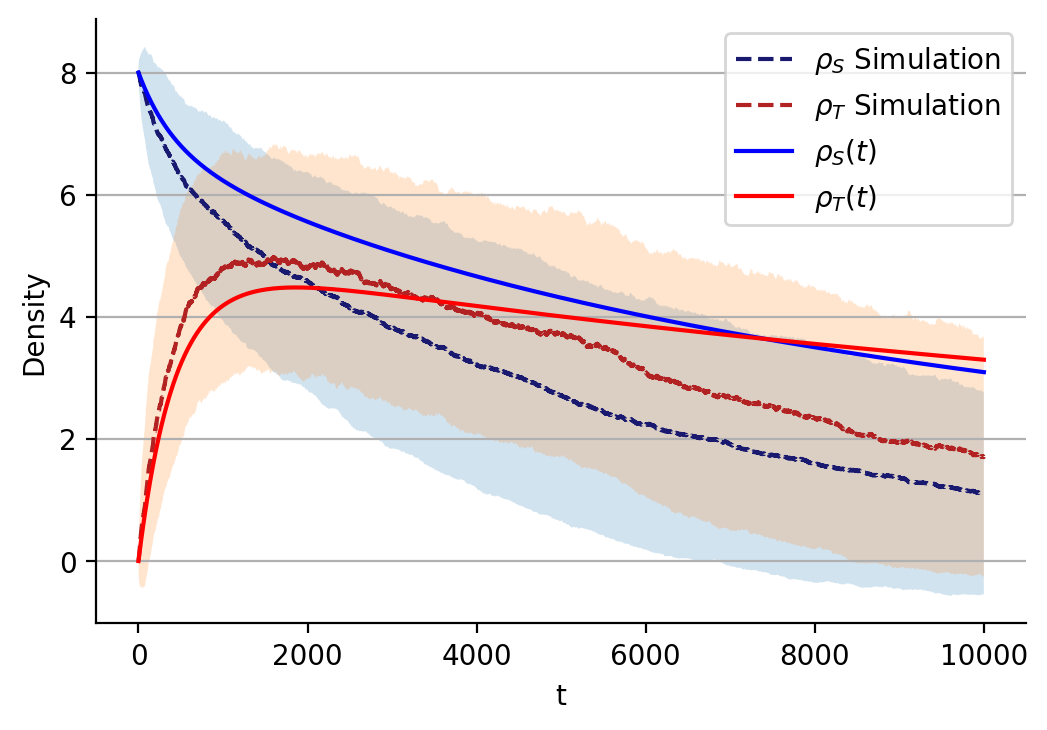

In [106]:
make_graph(8,0,12,12,0.8,0.5,0.5,2,500,10000)

| Parameter      | Value |
|----------------|-------|
| $\rho_{S}(0)$  | 8     |
| $\rho_{T}(0)$  | 0     |
| $N_{S}$        | 12    |
| $N_{T}$        | 12    |
| $\nu$          | 0.8   |
| $\alpha$       | 2     |
| $\overline{p}$ | 0.8   |
| $d$            | 0.5   |

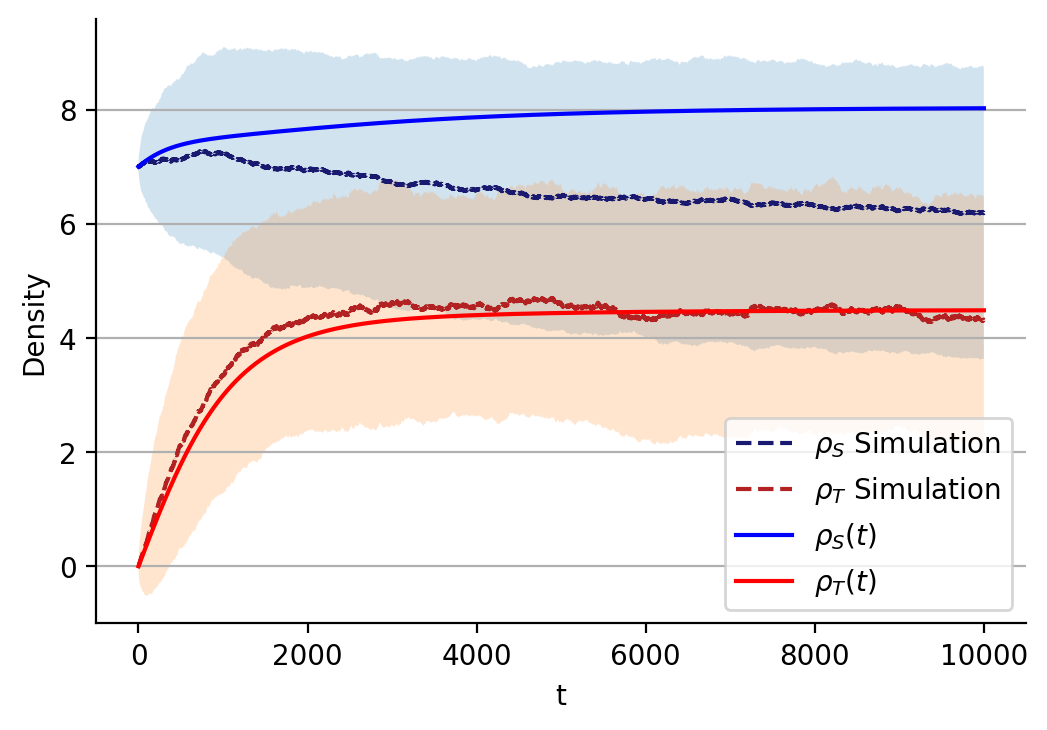

In [7]:
make_graph(7,0,12,12,0.8,0.5,0.8,2,500,10000)